<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


In [4]:
t1.std()**2

1.6666666666666665

![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [6]:
# TODO - during class, but please help!
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

import numpy as np
import pandas as pd

df = pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


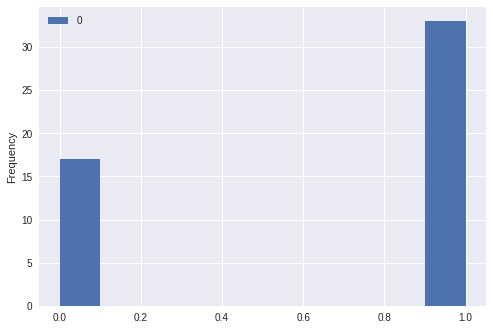

In [7]:
df.plot.hist()

In [8]:
# Now with confidence!

import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [9]:
# the t-statistic is the ratio of the departure of the estimated value of  a
# parameter from its hypothesized value to its standard error

# We want to calculate: tstat = 2.364321853156195

sample_stderr = 0.478518 / np.sqrt(len(survey_data))
sample_mean = 0.660000
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [10]:
len(survey_data)

50

In [0]:
# Science! Reproducibility...
import random

def make_soda_data(n=50):
  # Fair version
  # return pd.DataFrame([random.randint(0, 1) for _ in range(n)])
  # Unfair version!
  return pd.DataFrame(np.random.binomial(n=1, p=0.5, size=n))

In [12]:
make_soda_data(n=500).describe()

,0
count,500.000000
mean,0.492000
std,0.500437
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
t_statistics = []
p_values = []
n_experiments = 10  # Number of visitors

for _ in range(n_experiments):   
  df = make_soda_data(n=500000)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

,0
count,10.000000
mean,-0.273792
std,0.694428
min,-1.168141
25%,-0.600333
50%,-0.376180
75%,-0.083439
max,1.196425


In [14]:
pd.DataFrame(p_values).describe()

,0
count,10.000000
mean,0.579416
std,0.255611
min,0.231531
25%,0.354382
50%,0.622386
75%,0.721717
max,0.952636


In [23]:
random.choice([0, 1, 1])  # Unfair coins

0

In [36]:
np.random.binomial(100, 0.7)

75

In [25]:
np.random.binomial(1, 0.6)

1

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

t-test for one sample mean:


$$ T = \frac{\bar{x} - null}{SE}$$

$$ $$

$$ SE = \frac{std}{\sqrt{n}}$$

$$ $$

$$ CI = \bar{x} \pm t_{df}^* SE  $$

$$ $$


t-test for two independent means


$$ T = \frac{(\bar{x_1} - \bar{x_2}) - null}{SE}$$

$$ $$

$$SE_(\bar{x_1} - \bar{x_2}) = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } $$

$$ $$

$$CI = (\bar{x_1} - \bar{x_2}) \pm t_{df}^* SE_(\bar{x_1} - \bar{x_2})$$ 

$$ $$

$$df = min(n_1 - 1, n_2 - 1)$$


In [0]:
#t_test for two independent means in t-distribution
def t_test_two_ind_means(a, b, alpha=0.01, tails=2):
   
    #transform data series into arrays and calculate their lengths and variances
    a, b = np.array(a), np.array(b)
    na, nb = len(a), len(b)
    va, vb = a.var(), b.var()
    
    #degree of freedom, following the conservative way, choosing the minimum from two
    df = min(na - 1, nb - 1)
    
    #the difference btw two samples' means and SE for the two means
    mean_diff = a.mean() - b.mean()
    stn_error = np.sqrt(va/na + vb/nb)
    
    #t_stats and p_value
    t_stat = mean_diff / stn_error
    p_value = tails * stats.t.sf(abs(t_stat), df)
    
    #confidence levels
    ci_low = mean_diff - stats.t.ppf(1-alpha, df) * stn_error
    ci_high = mean_diff + stats.t.ppf(1-alpha, df) * stn_error
   
    return (t_stat, p_value, mean_diff, ci_low, ci_high)

Attribute Information for the dataset:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)

In [0]:
# TODO - your code here!
names = ['Party_Affil', 
           'handicapped_infants', 
           'water_project_cost_sharing', 
           'adoption_of_the_budget_resolution', 
           'physician_fee_freeze',
           'el_salvador_aid',
           'religious_groups_in_schools',
           'anti_satellite_test_ban',
           'aid_to_nicaraguan_contras',
           'mx_missile',
           'immigration',
           'synfuels_corporation_cutback',
           'education_spending',
           'superfund_right_to_sue',
           'crime',
           'duty_free_exports',
           'export_administration_act_south_africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None, names=names)

df.head(20)

In [0]:
# df = df_0.copy()
# numerize = {'y': 1, '?': 0.5, 'n': 0}
# for feat in df.columns.drop('Party_Affil'):
#   df[feat] = df_0[feat].map(numerize)

In [46]:
df['Party_Affil'].value_counts()

democrat      267
republican    168
Name: Party_Affil, dtype: int64

In [0]:
#On which issues congressmen preferred not to vote:
print(df[df['Party_Affil']=='republican'].isnull().sum()/len(df[df['Party_Affil']=='republican']))
print(df[df['Party_Affil']=='democrat'].isnull().sum()/len(df[df['Party_Affil']=='democrat']))
#from the data below one can see that roughly 10% congressment from both parties 
# did not vote on on'water-project-cost-sharing'issue and 13% of republicans and 
#30% of democrats did not vote on 'export-administration-act-south-africa' issue

In [0]:
# For better data analysis and plotting I'll replace 'y' values with 1,
#'n' values with 0, and '?'values with 0.5
df.replace({'y': 1, 'n': 0, '?': 0.5}, inplace = True)
df.head(20)

In [0]:
df.isnull().sum().sum()

In [0]:
def create_plot_crosstabs(df):
  for column in df.columns:
    df_cross = pd.crosstab(df['Party_Affil'], column, normalize=True)
    df_cross.plot.bar();

create_plot_crosstabs(df)    

In [0]:
df_dem = df[df['Party_Affil']=='democrat'].copy()
df_dem.head()

In [0]:
df_rep = df[df['Party_Affil']=='republican'].copy()
df_rep.head()

In [78]:
issues = [
           'handicapped_infants', 
           'water_project_cost_sharing', 
           'adoption_of_the_budget_resolution', 
           'physician_fee_freeze',
           'el_salvador_aid',
           'religious_groups_in_schools',
           'anti_satellite_test_ban',
           'aid_to_nicaraguan_contras',
           'mx_missile',
           'immigration',
           'synfuels_corporation_cutback',
           'education_spending',
           'superfund_right_to_sue',
           'crime',
           'duty_free_exports',
           'export_administration_act_south_africa']

# t_test for all issues the congressmen voted

t_tests = {}

for i in range (1, len(issues)):
  t_tests[issues[i]] = t_test_two_ind_means(df_dem[issues[i]], df_rep[issues[i]])

#print(t_tests)

democrats = []
republicans = []
  
#print name, t test, and p value for each issue
#with p < 0.01
#if t_stats > 0, democrats supported more, add to democrats list and 
#if t_stats < 0, republicans supported more, add to republicans list
for issue in t_tests.keys():
  print (issue, 'T-Statistic:', t_tests[issue][0], 'p-value:', t_tests[issue][1])
  if t_tests[issue][0] > 0 and t_tests[issue][1] < 0.01:
    democrats.append(issue)
  elif t_tests[issue][0] < 0 and t_tests[issue][1] < 0.01:  
    republicans.append(issue)

water_project_cost_sharing T-Statistic: -0.08800898616581461 p-value: 0.9299749799700597
adoption_of_the_budget_resolution T-Statistic: 22.48998586302323 p-value: 2.0864864348346466e-52
physician_fee_freeze T-Statistic: -52.442121124888914 p-value: 1.1885612910661186e-105
el_salvador_aid T-Statistic: -23.71353902569336 p-value: 2.4445940118184503e-55
religious_groups_in_schools T-Statistic: -10.889870263868682 p-value: 3.3083380697383495e-21
anti_satellite_test_ban T-Statistic: 12.430632149452329 p-value: 1.5530896249945638e-25
aid_to_nicaraguan_contras T-Statistic: 18.028173684817194 p-value: 4.957797043047096e-41
mx_missile T-Statistic: 17.362274097679965 p-value: 3.0255168496397664e-39
immigration T-Statistic: -1.7415583670177812 p-value: 0.0834271180065334
synfuels_corporation_cutback T-Statistic: 8.899476995692817 p-value: 9.018248938231243e-16
education_spending T-Statistic: -19.976853414478438 p-value: 3.950408238841512e-46
superfund_right_to_sue T-Statistic: -14.1207490624338 p

In [79]:
#Print both lists
print('The issues, that democrats support more than republicans with p < 0.01 are:')
for i in democrats:
  print(i)

  
print('The issues, that republicans support more than democrats with p < 0.01 are:')
for i in republicans:
  print(i)
  

The issues, that democrats support more than republicans with p < 0.01 are:
adoption_of_the_budget_resolution
anti_satellite_test_ban
aid_to_nicaraguan_contras
mx_missile
synfuels_corporation_cutback
duty_free_exports
export_administration_act_south_africa
The issues, that republicans support more than democrats with p < 0.01 are:
physician_fee_freeze
el_salvador_aid
religious_groups_in_schools
education_spending
superfund_right_to_sue
crime
